<a href="https://colab.research.google.com/github/ParadoxFlame/C117/blob/main/C117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix
A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarised with count values.



Remember that we have studied the binary type of logistic regression, where the outcome is either True, or False.

In this confusion matrix, the values are as follows -

True Positives - The values that were actually True and were predicted to be True as well
True Negatives - The values that were actually False and were predicted to be False as well
False Positives - The values that were actually False but were predicted to be True.
False Negatives - The values that were actually True but where predicted to be False.


Accuracy
The accuracy of a model is equal to -

True Positives + True Negatives / True Positives + True Negatives + False Positives + False Negatives




[Text(0, 0.5, 'Not Sick'), Text(0, 1.5, 'Sick')]

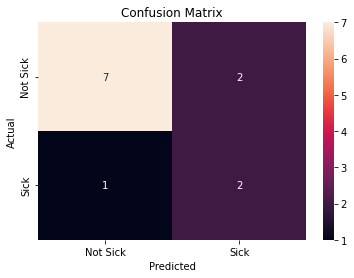

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
 
actual_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick"]
predicted_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Sick", "Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Not Sick"]
labels = ["Not Sick", "Sick"]
 
cm = confusion_matrix(actual_data, predicted_data, labels)
 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("heart.csv")

print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [ ]:
from sklearn.model_selection import train_test_split 
 
age = df["age"]
heart_attack = df["target"]
 
age_train, age_test, heart_attack_train, heart_attack_test = train_test_split(age, heart_attack, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np


X = np.reshape(age_train.ravel(), (len(age_train), 1))

Y = np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))


classifier = LogisticRegression(random_state = 0) 
classifier.fit(X, Y)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

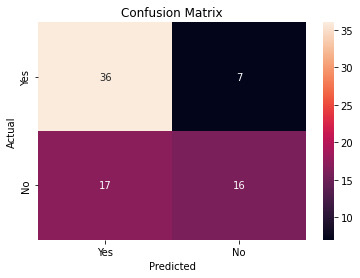

In [ ]:
labels = ["Yes", "No"]
 
cm = confusion_matrix(actual_values, predicted_values, labels)
 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
 



In [ ]:
from sklearn.model_selection import train_test_split 
 
heart_attack = df["target"]
factors = df[["age","sex","cp","chol","thalach"]]
 
factors_train, factors_test, heart_attack_train, heart_attack_test = train_test_split(factors, heart_attack, test_size = 0.25, random_state = 0)
 



In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
 
factors_train = sc_x.fit_transform(factors_train)  
factors_test = sc_x.transform(factors_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np


classifier2 = LogisticRegression(random_state = 0) 
classifier2.fit(factors_train, heart_attack_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
heart_attack_prediction_1 = classifier2.predict(factors_test)
 
predicted_values_1 = []
for i in heart_attack_prediction_1:
  if i == 0:
    predicted_values_1.append("No")
  else:
    predicted_values_1.append("Yes")
 
actual_values_1 = []
for i in heart_attack_test.ravel():
  if i == 0:
    actual_values_1.append("No")
  else:
    actual_values_1.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

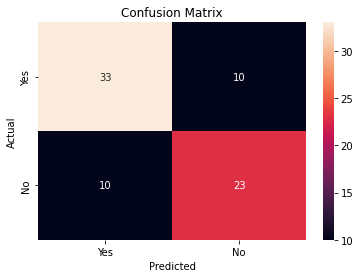

In [ ]:
cm = confusion_matrix(actual_values_1, predicted_values_1, labels)
 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
 

